# Welcome
##### Jalal Rahmanov's script

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

pd.options.display.max_columns = 10000
pd.options.display.max_rows = 50  #
pd.options.display.max_colwidth = -1

pd.options.display.min_rows = 15

In [183]:
data = pd.read_csv('heart.csv')

In [184]:
import copy

df = copy.deepcopy(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [186]:
df.isna().sum()
# There aren't null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [187]:
df.describe().T
# mean of Age is 54, that's why people are old
# sex column mean is 0.68 that's why there are more men in the data
# target is 0 or 1, binary. Mean of target is 0.54, that's why, there is no imbalance in the dataset

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [188]:
df.shape  # small dataset, suitable for visualization

(303, 14)

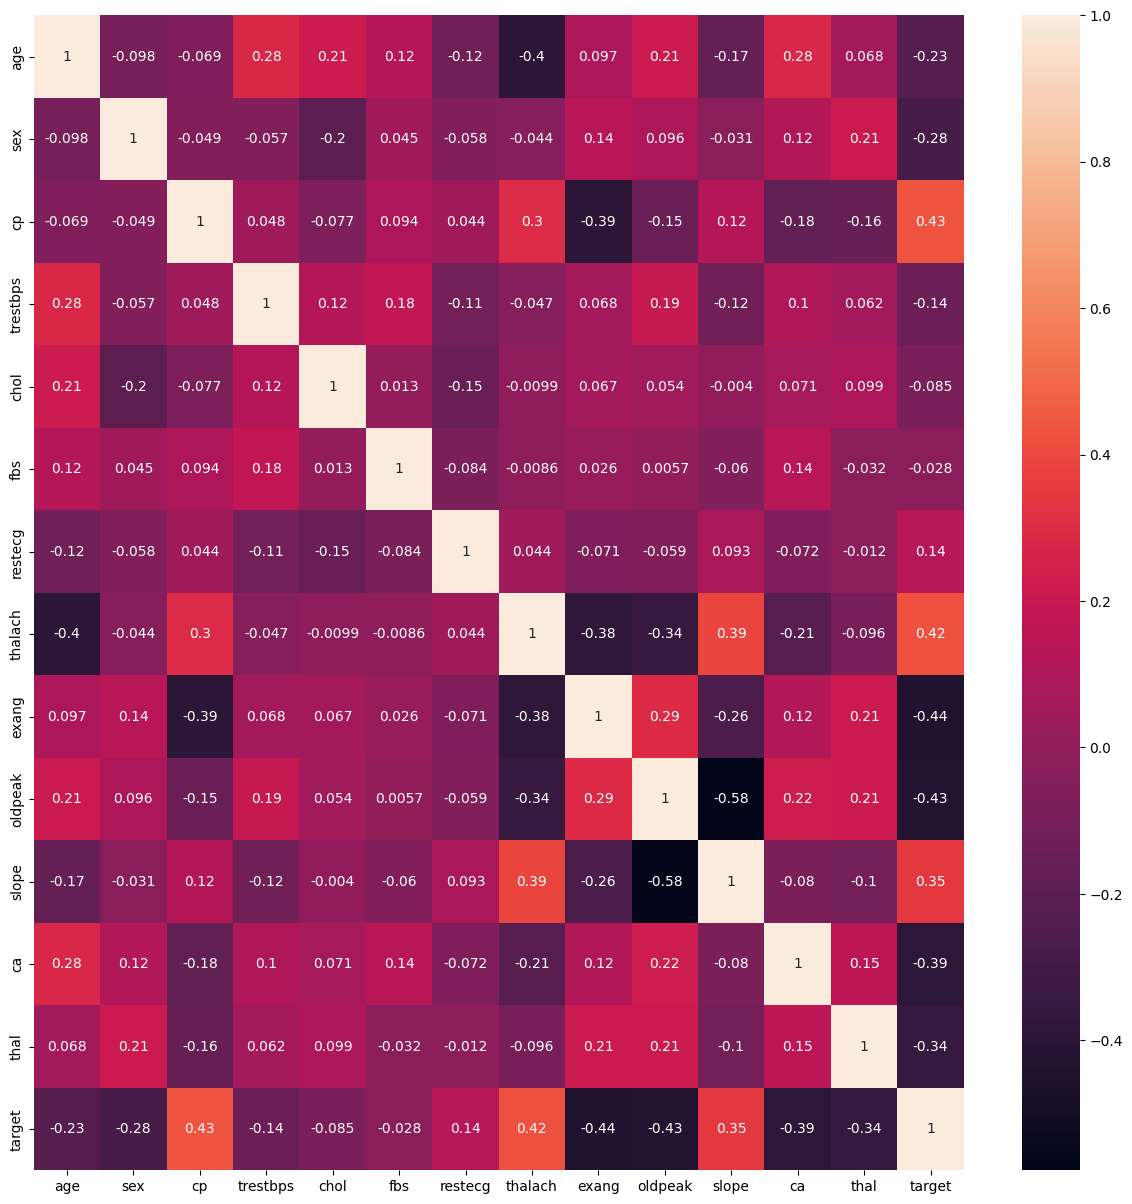

In [189]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

# target's correlation with other columns is important, if we look at, there are good correlation between target and all columns
# correlation between columns itself has to be less.
# negative correlation is also good :)

# Duplicate handling

In [190]:
df.drop_duplicates(inplace=True)

In [191]:
df.reset_index(drop=True, inplace=True)

# One-Hot-Encoding

In [192]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [193]:
df.nunique()
# We check if we have columns that need to be OHE

age         41 
sex         2  
cp          4  
trestbps    49 
chol        152
fbs         2  
restecg     3  
thalach     91 
exang       2  
oldpeak     40 
slope       3  
ca          5  
thal        4  
target      2  
dtype: int64

In [194]:
# cp = Chest pain column
df.cp.unique()
# We will apply OHE

array([3, 2, 1, 0])

In [195]:
# restech - resting electrocardiographic results
df.restecg.unique()
# We will apply OHE

array([0, 1, 2])

In [196]:
# slope column = the slope of the peak exercise ST segment
df.slope.unique()
# It shows medical number, doesn't need to do OHE

array([0, 2, 1])

In [197]:
# ca column = number of major vessels colored by flourosopy
df.ca.unique()
# Doesn't need OHE

array([0, 2, 1, 3, 4])

In [198]:
# We have to do OHE on that column, this is type of illness
df.thal.unique()
# We will apply OHE

array([1, 2, 3, 0])

In [199]:
# Column types have to be in object format for OHE
df[['cp', 'restecg', 'thal']] = df[['cp', 'restecg', 'thal']].astype(object)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.2+ KB


In [201]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(df[['cp', 'restecg', 'thal']])

transformed = ohe.transform(df[['cp', 'restecg', 'thal']]).toarray()

transformed_df = pd.DataFrame(transformed, columns=ohe.get_feature_names_out(['cp', 'restecg', 'thal']))

transformed_df.head()

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [202]:
df.drop(columns=['cp', 'restecg', 'thal'], axis=1, inplace=True)

In [203]:
df = pd.concat([df, transformed_df], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,2,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,1,120,236,0,178,0,0.8,2,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,57,0,120,354,0,163,1,0.6,2,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [204]:
# Check if duplicated column created
df.duplicated().any()

False

# Outlier check

In [205]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,2,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,1,120,236,0,178,0,0.8,2,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,57,0,120,354,0,163,1,0.6,2,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [206]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

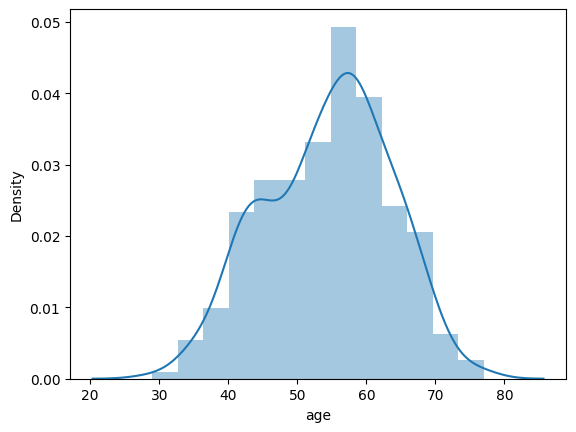

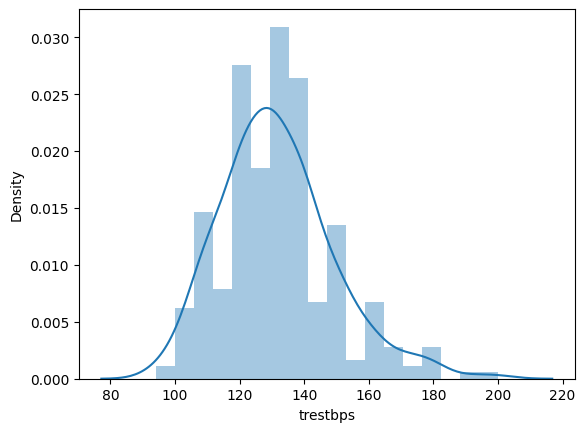

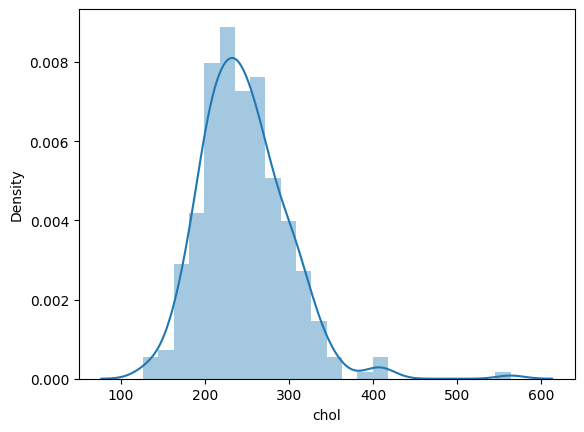

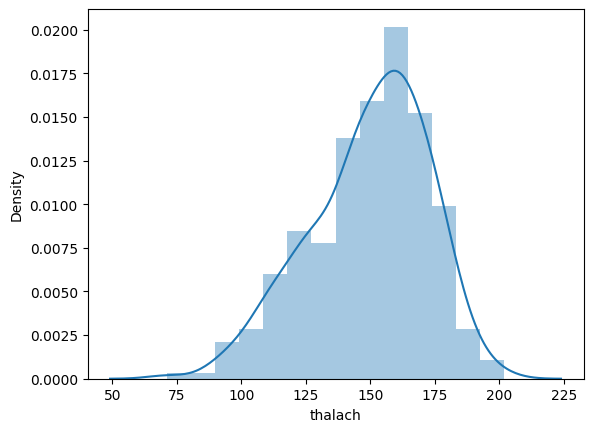

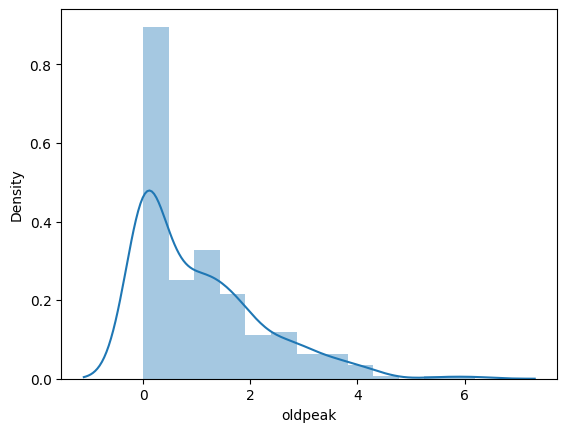

In [210]:
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
  sns.distplot(df[col])
  plt.show()

# trestbps column is right skewed a little bit, chol column has positive outliers, oldpeak column is right skewed

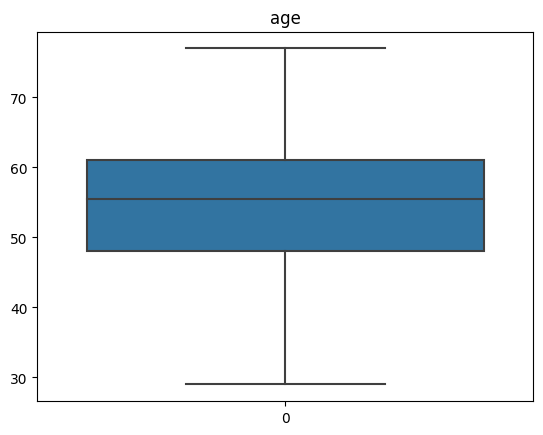

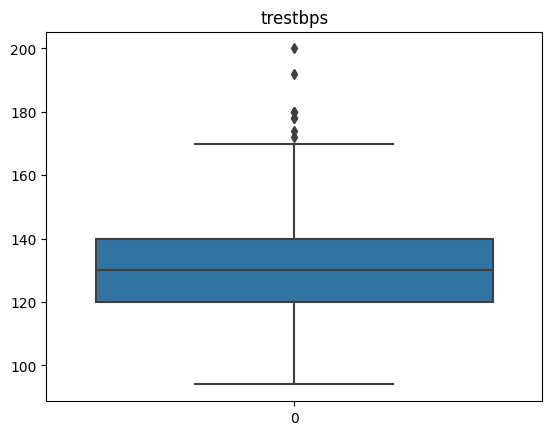

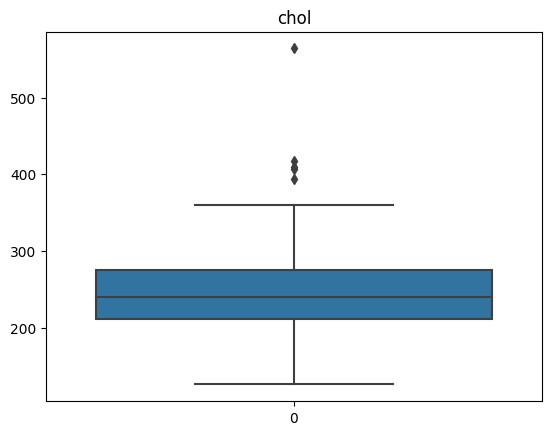

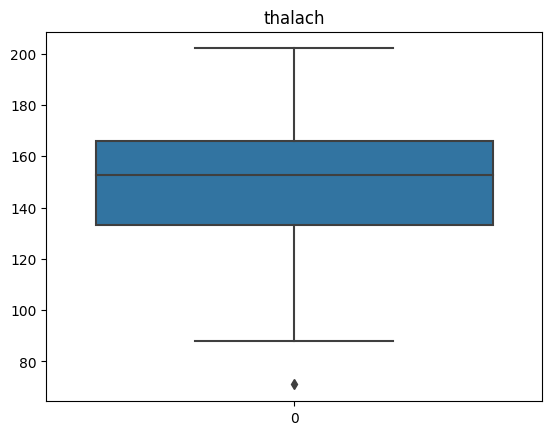

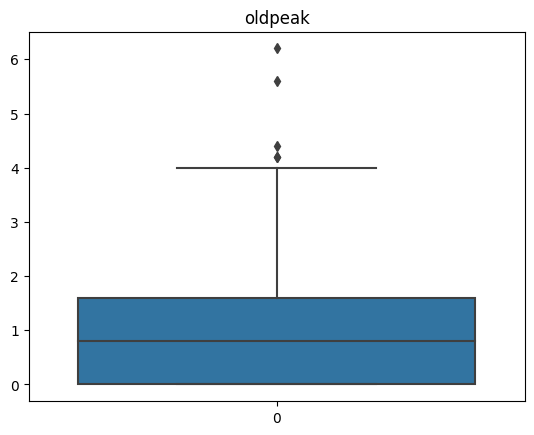

In [211]:
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

# trestbps column is right skewed a little bit, chol column has positive outliers, oldpeak column is right skewed

# Box-plot method outlier handling

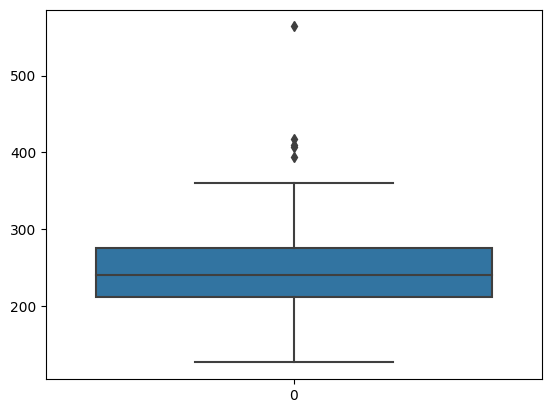

In [212]:
sns.boxplot(df['chol'])
plt.show()

In [213]:
def boxplot_clip(col):
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    iqr = q3 -  q1
    upperbound = q3 + 1.5*iqr
    lowerbound = q1 - 1.5*iqr
    df[col] = df[col].clip(lowerbound,upperbound)

In [214]:
# we handle only chol column otuliers
boxplot_clip('chol')

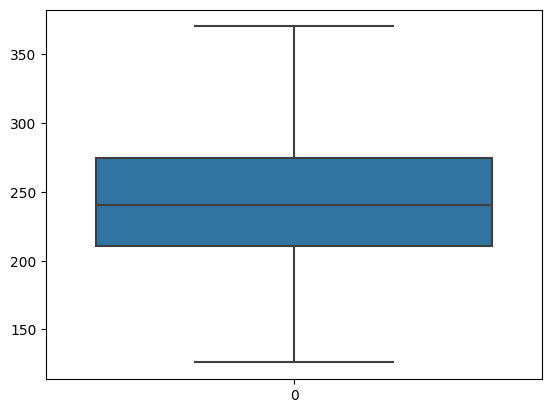

In [215]:
# after handling
sns.boxplot(df['chol'])
plt.show()

# Robust scaler for skewness

In [216]:
# trestbps and oldpeak columns are skewed. we will apply Robus scaler
from sklearn.preprocessing import RobustScaler
rc = RobustScaler().fit(df[['trestbps', 'oldpeak']])
df[['trestbps', 'oldpeak']] = rc.transform(df[['trestbps', 'oldpeak']])
df[['trestbps', 'oldpeak']] = rc.transform(df[['trestbps', 'oldpeak']])

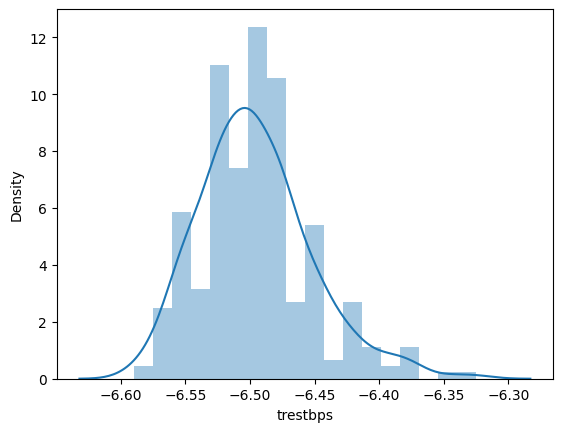

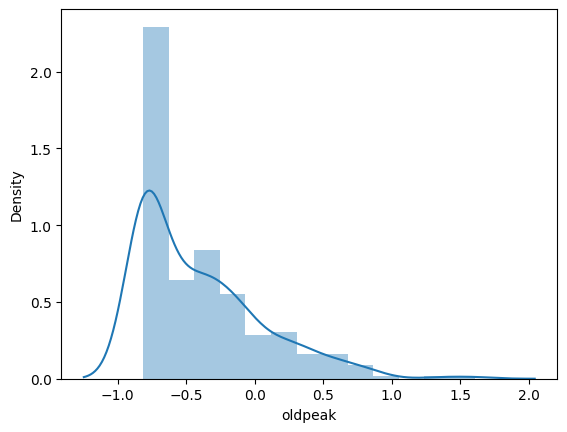

In [217]:
# after skewness handling, a little bit better
for col in ['trestbps', 'oldpeak']:
  sns.distplot(df['{}'.format(col)])
  plt.show()

In [218]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,-6.4625,233.0,1,150,0,0.085937,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,-6.5000,250.0,0,187,0,0.554687,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,-6.5000,204.0,0,172,0,-0.265625,2,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,1,-6.5250,236.0,0,178,0,-0.500000,2,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,57,0,-6.5250,354.0,0,163,1,-0.578125,2,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [219]:
# Scale all data with Standard Scaler
from sklearn.preprocessing import StandardScaler
rc = StandardScaler().fit(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = rc.transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = rc.transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [220]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,-5.919503,1,165.619672,-5.181365,1,-6.540430,0,3.287588,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-6.238151,1,146.104392,-5.173801,0,-6.469662,0,5.572445,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-6.189128,0,146.104392,-5.194268,0,-6.498352,0,1.573946,2,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-6.005293,1,133.094205,-5.180030,0,-6.486876,0,0.431518,2,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-5.993037,0,133.094205,-5.127528,0,-6.515566,1,0.050709,2,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Train test split

In [221]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101)

In [222]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((211, 21), (91, 21), (211,), (91,))

In [223]:
X_train_scaled = X_train
X_test_scaled = X_test

In [224]:
models_list = ["Logistic Regression",
               "KNN",'Naive Bayes',
               'SVM rbf',
               'SVM linear',
               'SVM poly',
               'SVM poly params',
               'Decision Tree',
               'Random Forest']

accuracy_list, cv_mean_list, precision_list, recall_list, f1_list, aucScore_list = [], [], [], [], [], []

# Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
classifier_object = LogisticRegression(random_state=42)
model_LR = classifier_object.fit(X_train_scaled, y_train)
y_pred_logistic_regression = model_LR.predict(X_test_scaled)

In [226]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
cm_logistic_regression = confusion_matrix(
    y_pred=y_pred_logistic_regression, y_true=y_test)
print("Confusion Matrix:\n", cm_logistic_regression)

accuracy_logistic_regression = accuracy_score(
    y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(
    y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)

accuracy_list.append(accuracy_logistic_regression)
precision_list.append(precision_logistic_regression)
recall_list.append(precision_logistic_regression)
f1_list.append(f1_logistic_regression)

print("\nAccuracy score:", accuracy_logistic_regression,
      '\nPrecision score:', precision_logistic_regression,
      '\nRecall score:', recall_logistic_regression,
      '\nf1 score:', f1_logistic_regression)

# TN  FP
# FN  TP

Confusion Matrix:
 [[32 11]
 [ 5 43]]

Accuracy score: 0.8241758241758241 
Precision score: 0.7962962962962963 
Recall score: 0.8958333333333334 
f1 score: 0.8431372549019608


# Cross Validation

In [227]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model_LR, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())
# std baxirsan cunki alinmis 4 model bir birinden az ferqlenirmi? eger cox ferqlenirse problemdi
# We have to look at standart deviation, because we have to check that, "Are builded 4 models different from each other?"
# If there is big difference, this is problem

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean accuracy of cross validation: 0.8250181422351234
Standard deviation of cross validation results: 0.04986598851110407


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.7s finished


0.9064922480620154



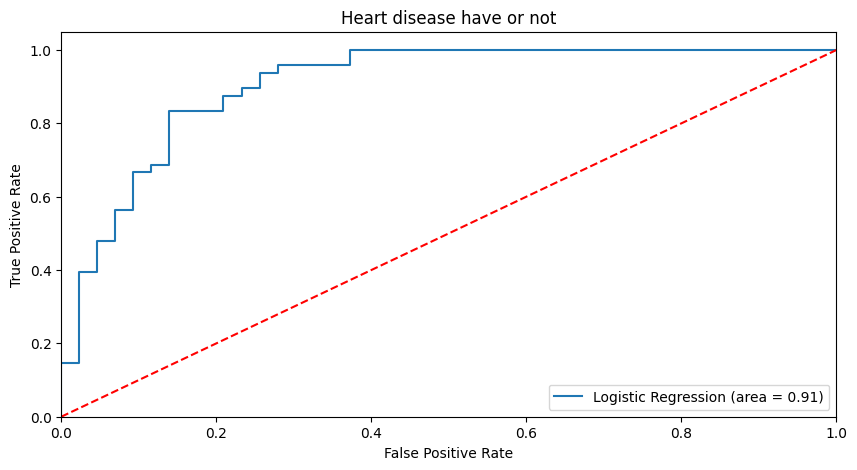

In [228]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

result = roc_auc_score(y_test, model_LR.predict_proba(X_test_scaled)[:,1])

print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test_scaled)[:,1])

print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of Logistic Regression Model')
plt.show()

# KNN (K-nearest neighbors)

In [229]:
from sklearn.neighbors import KNeighborsClassifier
classifier_object = KNeighborsClassifier(n_neighbors=7, n_jobs=-1, metric='euclidean')
model_KNN = classifier_object.fit(X_train_scaled, y_train)
y_pred_KNN = model_KNN.predict(X_test_scaled)

In [230]:
cm_KNN = confusion_matrix(
    y_pred=y_pred_KNN, y_true=y_test)
print("Confusion Matrix:\n", cm_KNN)

accuracy_KNN = accuracy_score(
    y_test, y_pred_KNN)
precision_KNN = precision_score(
    y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN)

accuracy_list.append(accuracy_KNN)
precision_list.append(precision_KNN)
recall_list.append(recall_KNN)
f1_list.append(f1_KNN)

print("\nAccuracy score:", accuracy_KNN,
      '\nPrecision score:', precision_KNN,
      '\nRecall score:', recall_KNN,
      '\nf1 score:', f1_KNN)

# TN  FP
# FN  TP

Confusion Matrix:
 [[22 21]
 [ 9 39]]

Accuracy score: 0.6703296703296703 
Precision score: 0.65 
Recall score: 0.8125 
f1 score: 0.7222222222222223


In [231]:
accuracies = cross_val_score(estimator=model_KNN, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())

Mean accuracy of cross validation: 0.7346698113207547
Standard deviation of cross validation results: 0.04170929052789483


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


0.7693798449612402



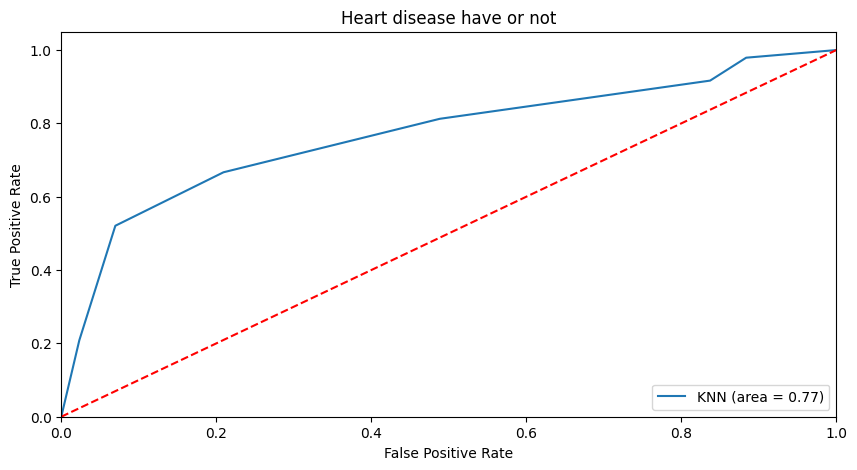

In [232]:
predict_proba_KNN = model_KNN.predict_proba(X_test_scaled)

result = roc_auc_score(y_test, model_KNN.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_KNN.predict_proba(X_test_scaled)[:,1])

print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of KNN Model')
plt.show()

# Gaussian Naive Bayes

In [233]:
from sklearn.naive_bayes import GaussianNB
classifier_object = GaussianNB()
model_NB = classifier_object.fit(X_train_scaled, y_train)
y_pred_NB = model_NB.predict(X_test_scaled)

In [234]:
cm_NB = confusion_matrix(
    y_pred=y_pred_NB, y_true=y_test)
print("Confusion Matrix:\n", cm_NB)

accuracy_NB = accuracy_score(
    y_test, y_pred_NB)
precision_NB = precision_score(
    y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test, y_pred_NB)

accuracy_list.append(accuracy_NB)
precision_list.append(precision_NB)
recall_list.append(recall_NB)
f1_list.append(f1_NB)

print("\nAccuracy score:", accuracy_NB,
      '\nPrecision score:', precision_NB,
      '\nRecall score:', recall_NB,
      '\nf1 score:', f1_NB)

# TN  FP
# FN  TP

# Recall is high, that's wth, we have a lot of 1 predictions, and they are wrong, but we found all 1s in reality

Confusion Matrix:
 [[25 18]
 [ 2 46]]

Accuracy score: 0.7802197802197802 
Precision score: 0.71875 
Recall score: 0.9583333333333334 
f1 score: 0.8214285714285714


In [235]:
accuracies = cross_val_score(estimator=model_NB, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())

Mean accuracy of cross validation: 0.7254172714078374
Standard deviation of cross validation results: 0.08414374713273833


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


0.8890503875968992



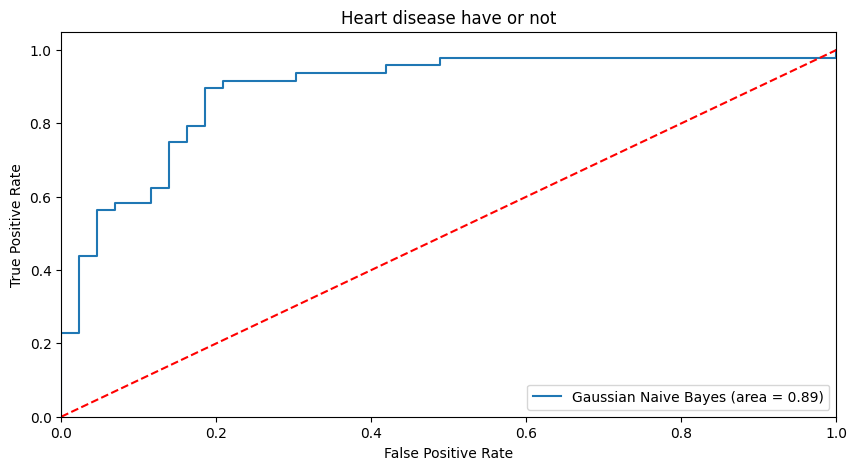

In [236]:
result = roc_auc_score(y_test, model_NB.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_NB.predict_proba(X_test_scaled)[:,1])
print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of Gaussian Naive Bayes Model')
plt.show()

# SVM - rbf kernel - radial basis function

In [237]:
from sklearn.svm import SVC
classifier_object = SVC(kernel='rbf', random_state=42, probability=True)
model_SVM_rbf = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVC_rbf = model_SVM_rbf.predict(X_test_scaled)

In [238]:
cm_SVC = confusion_matrix(
    y_pred=y_pred_SVC_rbf, y_true=y_test)
print("Confusion Matrix:\n", cm_SVC)

accuracy_SVC = accuracy_score(
    y_test, y_pred_SVC_rbf)
precision_SVC = precision_score(
    y_test, y_pred_SVC_rbf)
recall_SVC = recall_score(y_test, y_pred_SVC_rbf)
f1_SVC = f1_score(y_test, y_pred_SVC_rbf)

accuracy_list.append(accuracy_SVC)
precision_list.append(precision_SVC)
recall_list.append(recall_SVC)
f1_list.append(f1_SVC)

print("\nAccuracy score:", accuracy_SVC,
      '\nPrecision score:', precision_SVC,
      '\nRecall score:', recall_SVC,
      '\nf1 score:', f1_SVC)

# TN  FP
# FN  TP

Confusion Matrix:
 [[ 0 43]
 [ 0 48]]

Accuracy score: 0.5274725274725275 
Precision score: 0.5274725274725275 
Recall score: 1.0 
f1 score: 0.6906474820143885


In [239]:
accuracies = cross_val_score(estimator=model_SVM_rbf, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())

Mean accuracy of cross validation: 0.549800435413643
Standard deviation of cross validation results: 0.00455637458449724


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


0.813468992248062



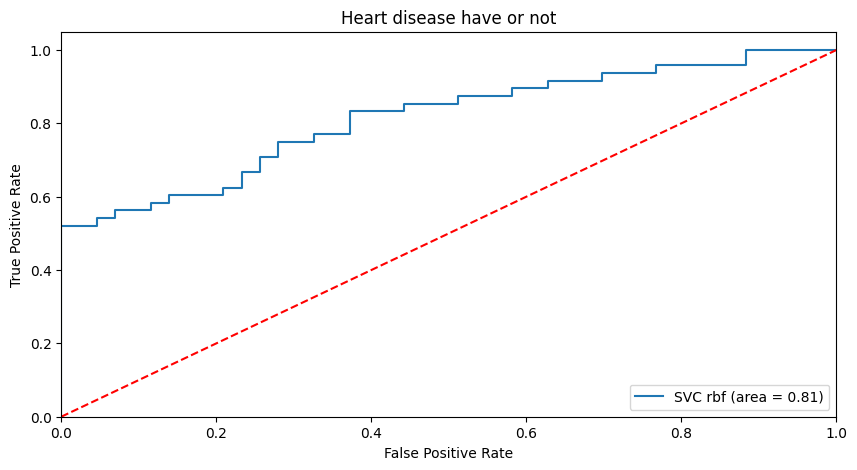

In [240]:
result = roc_auc_score(y_test, model_SVM_rbf.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_SVM_rbf.predict_proba(X_test_scaled)[:,1])
print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVC rbf (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of SVC rbf Model')
plt.show()

# SVM - linear kernel (in 2d) if 3d - model put plane in space

In [241]:
classifier_object = SVC(kernel='linear', random_state=42, probability=True)
model_SVM_linear = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVC_linear = model_SVM_linear.predict(X_test_scaled)

In [242]:
cm_SVC_linear = confusion_matrix(
    y_pred=y_pred_SVC_linear, y_true=y_test)
print("Confusion Matrix:\n", cm_SVC_linear)

accuracy_SVC_linear = accuracy_score(
    y_test, y_pred_SVC_linear)
precision_SVC_linear = precision_score(
    y_test, y_pred_SVC_linear)
recall_SVC_linear = recall_score(y_test, y_pred_SVC_linear)
f1_SVC_linear = f1_score(y_test, y_pred_SVC_linear)

accuracy_list.append(accuracy_SVC_linear)
precision_list.append(precision_SVC_linear)
recall_list.append(recall_SVC_linear)
f1_list.append(f1_SVC_linear)

print("\nAccuracy score:", accuracy_SVC_linear,
      '\nPrecision score:', precision_SVC_linear,
      '\nRecall score:', recall_SVC_linear,
      '\nf1 score:', f1_SVC_linear)

# TN  FP
# FN  TP

Confusion Matrix:
 [[33 10]
 [ 2 46]]

Accuracy score: 0.8681318681318682 
Precision score: 0.8214285714285714 
Recall score: 0.9583333333333334 
f1 score: 0.8846153846153847


In [243]:
accuracies = cross_val_score(estimator=model_SVM_linear, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean accuracy of cross validation: 0.8108671988388969
Standard deviation of cross validation results: 0.06870968879357504


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished


0.9069767441860466



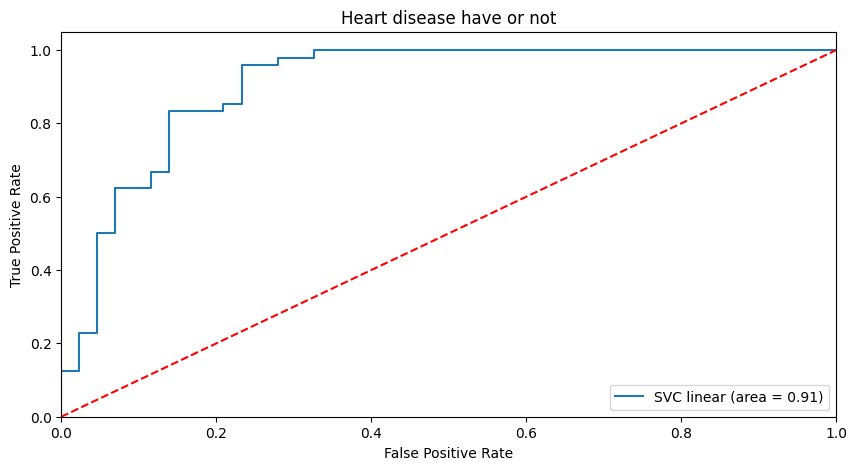

In [244]:
result = roc_auc_score(y_test, model_SVM_linear.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_SVM_linear.predict_proba(X_test_scaled)[:,1])
print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVC linear (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of SVC linear Model')
plt.show()

# SVM - poly kernel - polynomial kernel

r - coef0 and d - degree parameters are important

 (a*b + r)^d

In [245]:
classifier_object = SVC(kernel='poly', random_state=42, probability=True)    #default degree = 3, coef0 = 0
model_SVM_poly = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVC_poly = model_SVM_poly.predict(X_test_scaled)

In [246]:
cm_SVC_poly = confusion_matrix(
    y_pred=y_pred_SVC_poly, y_true=y_test)
print("Confusion Matrix:\n", cm_SVC_poly)

accuracy_SVC_poly = accuracy_score(
    y_test, y_pred_SVC_poly)
precision_SVC_poly = precision_score(
    y_test, y_pred_SVC_poly)
recall_SVC_poly = recall_score(y_test, y_pred_SVC_poly)
f1_SVC_poly = f1_score(y_test, y_pred_SVC_poly)

accuracy_list.append(accuracy_SVC_poly)
precision_list.append(precision_SVC_poly)
recall_list.append(recall_SVC_poly)
f1_list.append(f1_SVC_poly)

print("\nAccuracy score:", accuracy_SVC_poly,
      '\nPrecision score:', precision_SVC_poly,
      '\nRecall score:', recall_SVC_poly,
      '\nf1 score:', f1_SVC_poly)

# TN  FP
# FN  TP

# if precision is low and recall is high = type 2 error. FP - is high, we predicted false 1s.
# if precision is high, recall is low, FN is high, we predictied false 0s. Type 1 error.

Confusion Matrix:
 [[ 0 43]
 [ 0 48]]

Accuracy score: 0.5274725274725275 
Precision score: 0.5274725274725275 
Recall score: 1.0 
f1 score: 0.6906474820143885


In [247]:
accuracies = cross_val_score(estimator=model_SVM_poly, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())

Mean accuracy of cross validation: 0.5546081277213353
Standard deviation of cross validation results: 0.012883541928578351


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


0.7945736434108527



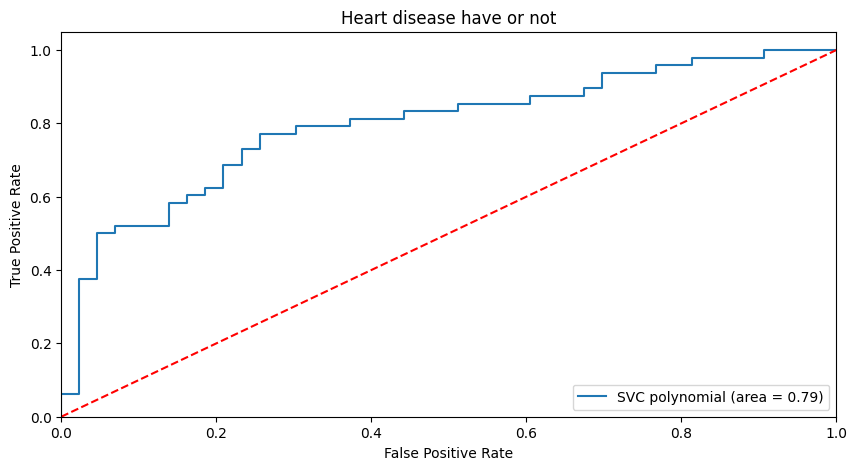

In [248]:
result = roc_auc_score(y_test, model_SVM_poly.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_SVM_poly.predict_proba(X_test_scaled)[:,1])
print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVC polynomial (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of SVC polynomial Model')
plt.show()

# SVM - kernel poly, parameters: degree = 4, coef0 = 2.0

In [251]:
classifier_object = SVC(kernel='poly', random_state=42, probability=True, degree=4, coef0=2.0)
model_SVM_poly_params = classifier_object.fit(X_train_scaled, y_train)
y_pred_SVC_poly_params = model_SVM_poly_params.predict(X_test_scaled)

In [252]:
cm_SVC_poly_params = confusion_matrix(
    y_pred=y_pred_SVC_poly_params, y_true=y_test)
print("Confusion Matrix:\n", cm_SVC_poly_params)

accuracy_SVC_poly_params = accuracy_score(
    y_test, y_pred_SVC_poly_params)
precision_SVC_poly_params = precision_score(
    y_test, y_pred_SVC_poly_params)
recall_SVC_poly_params = recall_score(y_test, y_pred_SVC_poly_params)
f1_SVC_poly_params = f1_score(y_test, y_pred_SVC_poly_params)

accuracy_list.append(accuracy_SVC_poly_params)
precision_list.append(precision_SVC_poly_params)
recall_list.append(recall_SVC_poly_params)
f1_list.append(f1_SVC_poly_params)

print("\nAccuracy score:", accuracy_SVC_poly_params,
      '\nPrecision score:', precision_SVC_poly_params,
      '\nRecall score:', recall_SVC_poly_params,
      '\nf1 score:', f1_SVC_poly_params)

# TN  FP
# FN  TP

Confusion Matrix:
 [[23 20]
 [ 4 44]]

Accuracy score: 0.7362637362637363 
Precision score: 0.6875 
Recall score: 0.9166666666666666 
f1 score: 0.7857142857142857


In [253]:
accuracies = cross_val_score(estimator=model_SVM_poly_params, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())

Mean accuracy of cross validation: 0.7823838896952106
Standard deviation of cross validation results: 0.04974306762077973


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


0.8316375968992248



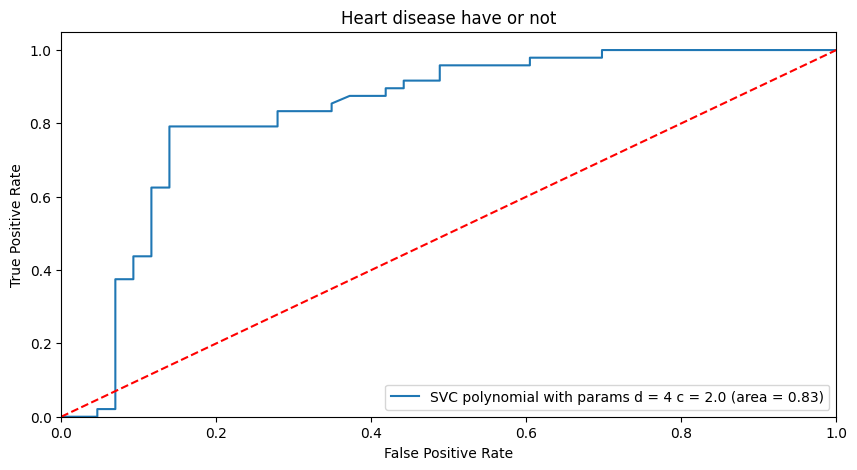

In [254]:
result = roc_auc_score(y_test, model_SVM_poly_params.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_SVM_poly_params.predict_proba(X_test_scaled)[:,1])
print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVC polynomial with params d = 4 c = 2.0 (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of SVC polynomial with params Model')
plt.show()

# gini score = (0.80 - 0.5) *2 = 0.30*2 = 0.60
# this model is not effective

# Decision Tree

In [255]:
from sklearn.tree import DecisionTreeClassifier
classifier_object = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_DT = classifier_object.fit(X_train_scaled, y_train)
y_pred_DT = model_DT.predict(X_test_scaled)

In [256]:
cm_DT = confusion_matrix(
    y_pred=y_pred_DT, y_true=y_test)
print("Confusion Matrix:\n", cm_DT)

accuracy_DT = accuracy_score(
    y_test, y_pred_DT)
precision_DT = precision_score(
    y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)

accuracy_list.append(accuracy_DT)
precision_list.append(precision_DT)
recall_list.append(recall_DT)
f1_list.append(f1_DT)

print("\nAccuracy score:", accuracy_DT,
      '\nPrecision score:', precision_DT,
      '\nRecall score:', recall_DT,
      '\nf1 score:', f1_DT)

# TN  FP
# FN  TP

Confusion Matrix:
 [[26 17]
 [ 8 40]]

Accuracy score: 0.7252747252747253 
Precision score: 0.7017543859649122 
Recall score: 0.8333333333333334 
f1 score: 0.7619047619047619


In [257]:
accuracies = cross_val_score(estimator=model_DT, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())

Mean accuracy of cross validation: 0.7064586357039186
Standard deviation of cross validation results: 0.047568649884695856


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


0.7189922480620154



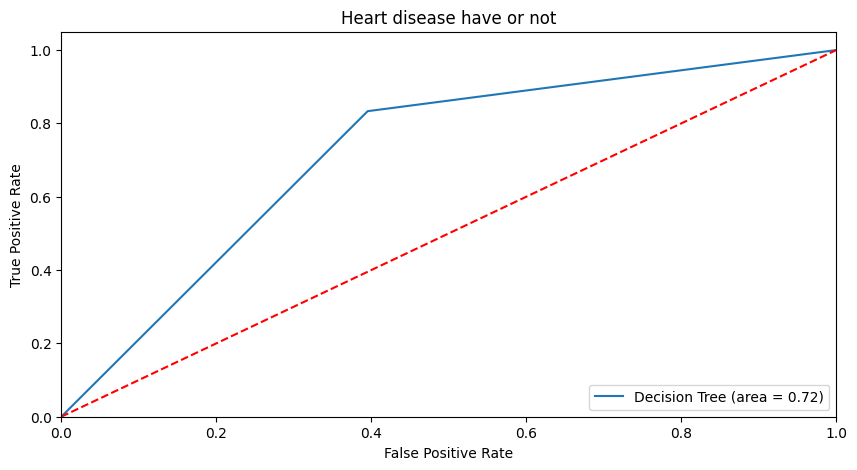

In [258]:
result = roc_auc_score(y_test, model_DT.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_DT.predict_proba(X_test_scaled)[:,1])
print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of Decision Tree Model')
plt.show()

# gini score = (0.72 - 0.5) *2 = 0.22*2 = 0.44
# the worst model :)

# Random Forest Classifier

In [259]:
from sklearn.ensemble import RandomForestClassifier
classifier_object = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', random_state=42, n_jobs=-1)
model_RF = classifier_object.fit(X_train_scaled, y_train)
y_pred_RF = model_RF.predict(X_test_scaled)

In [260]:
cm_RF = confusion_matrix(
    y_pred=y_pred_RF, y_true=y_test)
print("Confusion Matrix:\n", cm_RF)

accuracy_RF = accuracy_score(
    y_test, y_pred_RF)
precision_RF = precision_score(
    y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)

accuracy_list.append(accuracy_RF)
precision_list.append(precision_RF)
recall_list.append(recall_RF)
f1_list.append(f1_RF)

print("\nAccuracy score:", accuracy_RF,
      '\nPrecision score:', precision_RF,
      '\nRecall score:', recall_RF,
      '\nf1 score:', f1_RF)

# TN  FP
# FN  TP

Confusion Matrix:
 [[31 12]
 [ 7 41]]

Accuracy score: 0.7912087912087912 
Precision score: 0.7735849056603774 
Recall score: 0.8541666666666666 
f1 score: 0.811881188118812


In [261]:
accuracies = cross_val_score(estimator=model_RF, X = X_train_scaled, y=y_train, cv=4, n_jobs=-1, verbose=2)
mean = accuracies.mean()
cv_mean_list.append(mean)
print("Mean accuracy of cross validation:", mean)
print('Standard deviation of cross validation results:', accuracies.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean accuracy of cross validation: 0.8155841799709724
Standard deviation of cross validation results: 0.0532358688115278


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s finished


0.903343023255814



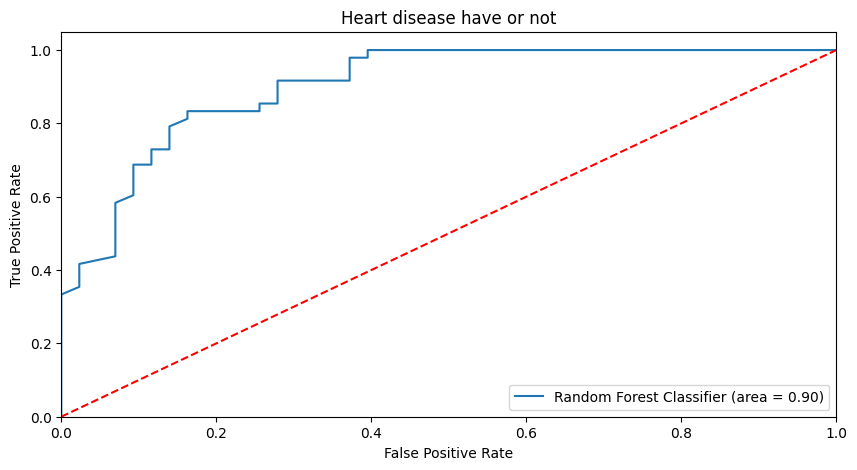

In [262]:
result = roc_auc_score(y_test, model_RF.predict_proba(X_test_scaled)[:,1])
print(result)
aucScore_list.append(result)

fpr, tpr, thresholds = roc_curve(y_test, model_RF.predict_proba(X_test_scaled)[:,1])
print()
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart disease have or not')
plt.legend(loc="lower right")
plt.savefig('Roc Auc Curve of Random Forest Classifier Model')
plt.show()

# gini score = (0.90 - 0.5) *2 = 0.40*2 = 0.80

# Evaluation all models

In [263]:
myEvaluation = list(zip(models_list, accuracy_list, cv_mean_list, precision_list, recall_list, f1_list, aucScore_list))

In [264]:
df = pd.DataFrame(data=myEvaluation, columns=['Model', 'Accuracy', 'CV_mean', 'Precision', 'Recall', 'F1_score', 'Auc_Score'])

In [265]:
df

,Model,Accuracy,CV_mean,Precision,Recall,F1_score,Auc_Score
0,Logistic Regression,0.824176,0.825018,0.796296,0.796296,0.843137,0.906492
1,KNN,0.670330,0.734670,0.650000,0.812500,0.722222,0.769380
2,Naive Bayes,0.780220,0.725417,0.718750,0.958333,0.821429,0.889050
3,SVM rbf,0.527473,0.549800,0.527473,1.000000,0.690647,0.813469
4,SVM linear,0.868132,0.810867,0.821429,0.958333,0.884615,0.906977
5,SVM poly,0.527473,0.554608,0.527473,1.000000,0.690647,0.794574
6,SVM poly params,0.736264,0.782384,0.687500,0.916667,0.785714,0.831638
7,Decision Tree,0.736264,0.706459,0.687500,0.916667,0.785714,0.718992
8,Random Forest,0.725275,0.815584,0.701754,0.833333,0.761905,0.903343


In [266]:
col = df.loc[:, ['Accuracy', 'F1_score', 'Auc_Score']]
col

,Accuracy,F1_score,Auc_Score
0,0.824176,0.843137,0.906492
1,0.670330,0.722222,0.769380
2,0.780220,0.821429,0.889050
3,0.527473,0.690647,0.813469
4,0.868132,0.884615,0.906977
5,0.527473,0.690647,0.794574
6,0.736264,0.785714,0.831638
7,0.736264,0.785714,0.718992
8,0.725275,0.761905,0.903343


In [267]:
df['Overall'] = col.mean(axis='columns')
df

,Model,Accuracy,CV_mean,Precision,Recall,F1_score,Auc_Score,Overall
0,Logistic Regression,0.824176,0.825018,0.796296,0.796296,0.843137,0.906492,0.857935
1,KNN,0.670330,0.734670,0.650000,0.812500,0.722222,0.769380,0.720644
2,Naive Bayes,0.780220,0.725417,0.718750,0.958333,0.821429,0.889050,0.830233
3,SVM rbf,0.527473,0.549800,0.527473,1.000000,0.690647,0.813469,0.677196
4,SVM linear,0.868132,0.810867,0.821429,0.958333,0.884615,0.906977,0.886575
5,SVM poly,0.527473,0.554608,0.527473,1.000000,0.690647,0.794574,0.670898
6,SVM poly params,0.736264,0.782384,0.687500,0.916667,0.785714,0.831638,0.784539
7,Decision Tree,0.736264,0.706459,0.687500,0.916667,0.785714,0.718992,0.746990
8,Random Forest,0.725275,0.815584,0.701754,0.833333,0.761905,0.903343,0.796841


In [268]:
# Best model

df.sort_values(by=['Overall', 'F1_score', 'CV_mean', 'Auc_Score'], ascending=False)

,Model,Accuracy,CV_mean,Precision,Recall,F1_score,Auc_Score,Overall
4,SVM linear,0.868132,0.810867,0.821429,0.958333,0.884615,0.906977,0.886575
0,Logistic Regression,0.824176,0.825018,0.796296,0.796296,0.843137,0.906492,0.857935
2,Naive Bayes,0.780220,0.725417,0.718750,0.958333,0.821429,0.889050,0.830233
8,Random Forest,0.725275,0.815584,0.701754,0.833333,0.761905,0.903343,0.796841
6,SVM poly params,0.736264,0.782384,0.687500,0.916667,0.785714,0.831638,0.784539
7,Decision Tree,0.736264,0.706459,0.687500,0.916667,0.785714,0.718992,0.746990
1,KNN,0.670330,0.734670,0.650000,0.812500,0.722222,0.769380,0.720644
3,SVM rbf,0.527473,0.549800,0.527473,1.000000,0.690647,0.813469,0.677196
5,SVM poly,0.527473,0.554608,0.527473,1.000000,0.690647,0.794574,0.670898


In [269]:
#Our answer is:

df.sort_values(by=['Overall', 'F1_score', 'CV_mean', 'Auc_Score'], ascending=False).iloc[[0]]

,Model,Accuracy,CV_mean,Precision,Recall,F1_score,Auc_Score,Overall
4,SVM linear,0.868132,0.810867,0.821429,0.958333,0.884615,0.906977,0.886575


# Thanks

##### Respectfully Jalal Rahmanov